In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1.8 CBOW/Skip-gram model

Literature: [here](http://arxiv.org/pdf/1301.3781v3.pdf) and [here](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf).

In [1]:
import nltk
from tethne.readers import zotero
import matplotlib.pyplot as plt
from helpers import normalize_token, filter_token
import gensim
from itertools import groupby, islice

In [2]:
text_root = '../data/EmbryoProjectTexts/files'
zotero_export_path = '../data/EmbryoProjectTexts'

corpus = nltk.corpus.PlaintextCorpusReader(text_root, 'https.+')
metadata = zotero.read(zotero_export_path, index_by='link', follow_links=False)

In [3]:
years = []
documents = []
for fileid in corpus.fileids():
    for sentence in corpus.sents(fileids=[fileid]):
        years.append(metadata[fileid].date)
        documents.append([normalize_token(token) 
                          for token in sentence 
                          if filter_token(token)])

In [4]:
len(documents)

51943

In [5]:
model = gensim.models.Word2Vec(documents, size=200, window=5)

Similary is measured using cosine distance in the low-dimensional embedding/vector space.

In [31]:
model.most_similar(positive=['cell'])

[(u'nucleus', 0.6756647825241089),
 (u'derived', 0.6577451825141907),
 (u'adult', 0.6551524996757507),
 (u'differentiate', 0.5955120921134949),
 (u'embryonic', 0.5923236012458801),
 (u'interaction', 0.5920150279998779),
 (u'line', 0.5903056263923645),
 (u'differentiated', 0.5851104259490967),
 (u'tissue', 0.5801264643669128),
 (u'registry', 0.5774797201156616)]

In [39]:
model.similarity('egg', 'ovum'), model.similarity('egg', 'embryo'), model.similarity('egg', 'brain')

(0.68291990417474357, 0.33644428780437841, 0.091136195140101212)

In [61]:
model.syn0.shape     # Words x Dimensions.

(9769, 200)

In [63]:
len(model.index2word)

9769

## PCA on lower-dimensional projection

In [7]:
from sklearn import decomposition

In [52]:
focal_words = ['egg', 'ontogeny', 'ovum', 'fetus', 'ivf', 'uterus', 'brain', 
               'neuron', 'cell', 'transplantation', 'culture', 'stem', 'nucleus']

In [53]:
focal_indices = [model.index2word.index(w) for w in focal_words]

In [54]:
pca = decomposition.PCA(n_components=2)

In [55]:
t = pca.fit_transform(model.syn0[focal_indices, :])

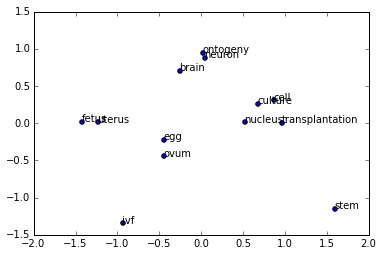

In [56]:
plt.scatter(t[:, 0], t[:, 1])
for i in xrange(len(focal_indices)):
    w = focal_words[i]
    plt.text(t[i, 0], t[i, 1], w)